In [1]:
%matplotlib inline
from pymatgen.io.vasp import Vasprun, BSVasprun
from pymatgen.electronic_structure.plotter import \
                      DosPlotter,\
                      BSPlotter, \
                      BSDOSPlotter, \
                      BSPlotterProjected
import matplotlib.pyplot as plt
import numpy as np
from pymatgen import Spin
from pymatgen.io.vasp.inputs import Kpoints
import pandas as pd
import pdb

In [2]:
plt.rc('figure', figsize=(14,10))
plt.style.use('seaborn')
plt.rc('text', usetex=True)
plt.rc('font',size=14)

In [5]:
def continuous_plot(b_s,veq, ylim=[-0.5, 0.1], bands=[21,22,23]):
    rel_volume = b_s.structure.volume / veq
    ibranches = [0, 2, 3, 4, 5, 6]
    rel_distance = b_s.distance[b_s.branches[1]['end_index']]-b_s.distance[b_s.branches[0]['end_index']]
    labels=list(b_s.labels_dict.keys())
    for l, label in enumerate(labels):
        labels[l]='$'+label+'$'
    labels=labels[:-1]+['$M$']
    x_ticks=[]
    CVM = b_s.bands[Spin.up][23].max()
    L = []
    #E0 = []a
    #E1 = []
    #E2 = []
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_axes([0.1, 0.2, 0.9, 0.8])
    ax.axvline(b_s.distance[0], c='k',linewidth=1)
    E=[]
    for n in range(len(bands)):
        #pdb.set_trace()
        E.append([])
    for b, branch in enumerate(ibranches):
        i_start = b_s.branches[branch]['start_index']
        i_end = b_s.branches[branch]['end_index']
        if branch > 1:
            rel_origin = rel_distance
        else:
            rel_origin = 0
        x_ticks.append(b_s.distance[i_start] - rel_origin)
    #    plt.plot(
    #        np.array(b_s.distance[i_start:i_end])-rel_origin,
    #        b_s.bands[Spin.up][22][i_start:i_end]-CVM,'oc')
        #plt.plot(
        L += list(np.array(b_s.distance[i_start:i_end])-rel_origin)
        for n,b in enumerate(bands):
            E[n] += list(b_s.bands[Spin.up][b][i_start:i_end]-CVM)
        #E1 += list(b_s.bands[Spin.up][22][i_start:i_end]-CVM)
        #E2 += list(b_s.bands[Spin.up][23][i_start:i_end]-CVM)
            #)
        ax.axvline(b_s.distance[i_end]-rel_origin,c='k', linewidth=1)
    x_ticks.append(b_s.distance[i_end] - rel_origin)    
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(labels, fontsize=14)
    ax.set_ylabel('$E-E_{VBM}$', fontsize=16)
    ax.set_title('$V/V_0=${:0.2f}'.format(rel_volume), fontsize=14)
    for n,b in enumerate(bands):
        ax.plot(L,E[n],'k')
    #ax.plot(L,E1,'k')
    #ax.plot(L,E2,'k')
    ax.set_ylim(ylim)
    ax.set_xlim([min(x_ticks),max(x_ticks)])
    return fig, ax

In [ ]:
continuous_plot(bs, Veq,ylim=[-6,10], bands=range(120))

In [4]:
constante = 7.6202713   # hbar^2 / me

In [6]:
v = Vasprun('ZrO2-new-05/TOTEN_5dir/vasprun.xml')

/usr/lib64/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol O has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE']
  BadPotcarWarning)
/usr/lib64/python3.6/site-packages/pymatgen/io/vasp/inputs.py:1859: BadPotcarWarning: POTCAR with symbol Zr_sv has metadata that does not match                          any VASP POTCAR known to pymatgen. The data in this                          POTCAR is known to match the following functionals:                          ['PBE']
  BadPotcarWarning)


In [7]:
cdos=v.complete_dos

In [8]:
element_dos = cdos.get_element_dos()
plotter = DosPlotter(zero_at_efermi=True)
plotter.add_dos_dict(element_dos)
#plotter.show(xlim=[-5, 5], ylim=[0, 1])

In [10]:
efermi = cdos.efermi
print(efermi)

2.9375


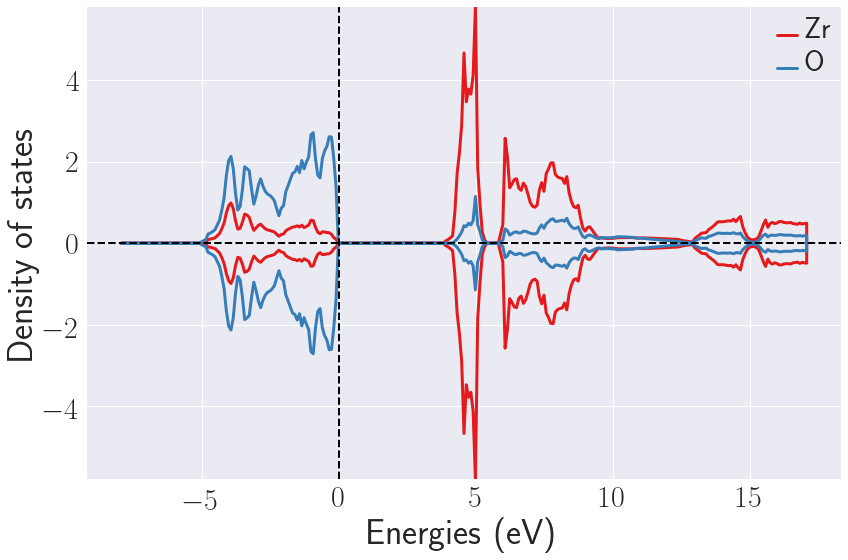

In [11]:
plotter.show()

# Estructura de bandas

In [12]:
b = BSVasprun('ZrO2-new-05/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)

In [13]:
bs = b.get_band_structure("ZrO2-new-05/BANDSdir/KPOINTS",efermi=cdos.efermi)

In [14]:
Veq = bs.structure.volume

In [15]:
bsplot = BSDOSPlotter(bs_projection="elements", dos_projection="elements", )

In [16]:
bsprojplot = BSPlotterProjected(bs)

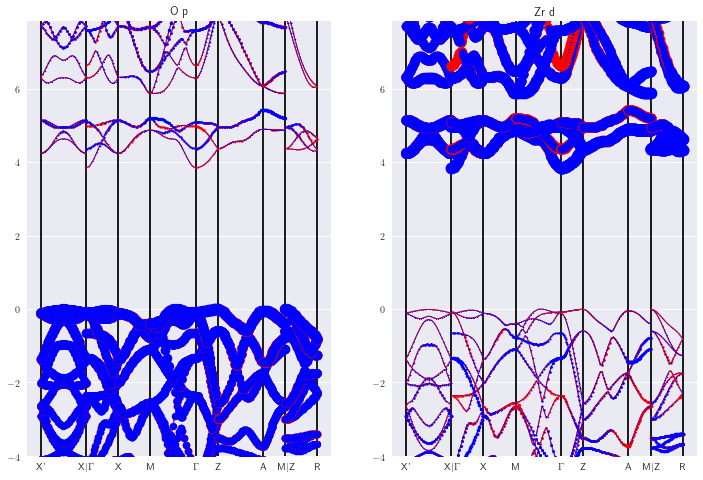

In [79]:
orb_proj_bs = bsprojplot.get_projected_plots_dots({'O':['p'], 'Zr':['d']})

In [18]:
cdos.as_dict()

{'@module': 'pymatgen.electronic_structure.dos',
 '@class': 'CompleteDos',
 'efermi': 2.9375,
 'structure': {'@module': 'pymatgen.core.structure',
  '@class': 'Structure',
  'charge': None,
  'lattice': {'matrix': [[3.645907, 0.0, 0.0],
    [0.0, 3.645907, 0.0],
    [0.0, 0.0, 5.275147]],
   'a': 3.645907,
   'b': 3.645907,
   'c': 5.275147,
   'alpha': 90.0,
   'beta': 90.0,
   'gamma': 90.0,
   'volume': 70.1206186904878},
  'sites': [{'species': [{'element': 'O', 'occu': 1}],
    'abc': [0.5, 0.0, 0.197616],
    'xyz': [1.8229535, 0.0, 1.042453449552],
    'label': 'O',
    'properties': {}},
   {'species': [{'element': 'O', 'occu': 1}],
    'abc': [0.5, 0.0, 0.697616],
    'xyz': [1.8229535, 0.0, 3.680026949552],
    'label': 'O',
    'properties': {}},
   {'species': [{'element': 'O', 'occu': 1}],
    'abc': [0.0, 0.5, 0.802384],
    'xyz': [0.0, 1.8229535, 4.232693550447999],
    'label': 'O',
    'properties': {}},
   {'species': [{'element': 'O', 'occu': 1}],
    'abc': [0.0, 0

<module 'matplotlib.pyplot' from '/usr/lib64/python3.6/site-packages/matplotlib/pyplot.py'>

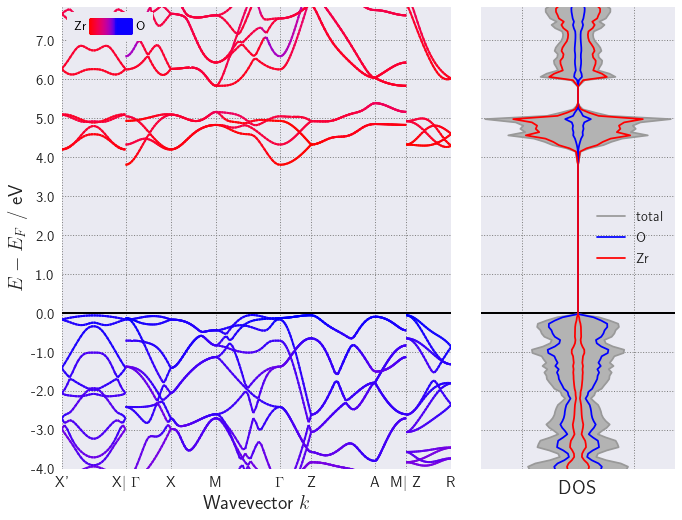

In [19]:
bsplot.get_plot(bs, dos=cdos, )

(<Figure size 720x576 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x7f3de1743a20>)

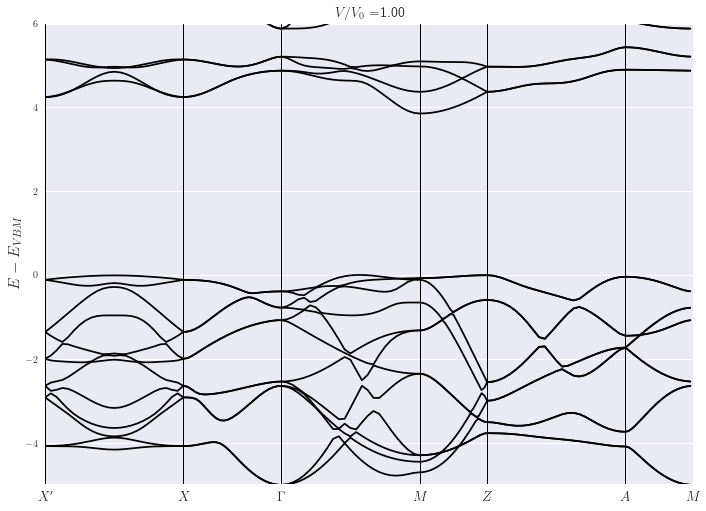

In [31]:
continuous_plot(bs,Veq, ylim=[-5, 6], bands=range(120))

In [21]:
bsplot

In [76]:
PROJS=bs.get_projections_on_elements_and_orbitals({'O':['px', 'py','pz'],'Zr':['d']})[Spin.up]

In [ ]:
PROJS

In [58]:
PS=pd.DataFrame(PROJS[0])['O']

In [59]:
PS

0      {'p': 0.0006000000000000001}
1      {'p': 0.0006000000000000001}
2      {'p': 0.0006000000000000001}
3      {'p': 0.0006000000000000001}
4                     {'p': 0.0004}
                   ...             
195    {'p': 0.0006000000000000001}
196    {'p': 0.0006000000000000001}
197    {'p': 0.0006000000000000001}
198    {'p': 0.0006000000000000001}
199    {'p': 0.0006000000000000001}
Name: O, Length: 200, dtype: object

In [53]:
PS.count()

200

In [54]:
def get_char_vals(PS, bandnum):
    C = []
    for i in range(PS.count()):
        C.append(PS[bandnum][i][])
    return np.array(C)

In [55]:
Op = get_char_vals(PS)

In [56]:
Op

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


# Continous bands in equilibrium

In [ ]:
continuous_plot(bs, Veq)

# en compresión

In [ ]:
path = 'ZrO2-new-00'
b0 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs0 = b0.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=cdos.efermi)

In [ ]:
continuous_plot(bs0,Veq)

In [ ]:
path = 'ZrO2-new-01'
b1 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs1 = b1.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b1.efermi)

In [ ]:
continuous_plot(bs1, Veq)

In [ ]:
path = 'ZrO2-new-02'
b2 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs2 = b2.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b2.efermi)

In [ ]:
continuous_plot(bs1, Veq)

In [ ]:
path = 'ZrO2-new-02'
b2 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs2 = b2.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b2.efermi)

In [ ]:
continuous_plot(bs2, Veq)

In [ ]:
path = 'ZrO2-new-03'
b3 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs3 = b3.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b3.efermi)

In [ ]:
continuous_plot(bs3, Veq)

In [ ]:
path = 'ZrO2-new-04'
b4 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs4 = b4.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b4.efermi)

In [ ]:
continuous_plot(bs4, Veq)

# Expansión

In [ ]:
path = 'ZrO2-new-06'
b6 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs6 = b6.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b6.efermi)

In [ ]:
continuous_plot(bs6, Veq)

In [ ]:
path = 'ZrO2-new-07'
b7 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs7 = b7.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b7.efermi)

In [ ]:
continuous_plot(bs7, Veq)

In [ ]:
path = 'ZrO2-new-08'
b8 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs8 = b8.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b8.efermi)

In [ ]:
continuous_plot(bs8, Veq)

In [ ]:
path = 'ZrO2-new-10'
b10 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs10 = b10.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b10.efermi)

In [ ]:
continuous_plot(bs10, Veq)

In [ ]:
path = 'ZrO2-new-11'
b11 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs11 = b11.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b11.efermi)

In [ ]:
continuous_plot(bs11, Veq)

In [ ]:
path = 'ZrO2-new-12'
b12 = BSVasprun(path+'/BANDSdir/vasprun.xml.gz',parse_projected_eigen=True)
bs12 = b12.get_band_structure(path+"/BANDSdir/KPOINTS",efermi=b12.efermi)

In [ ]:
continuous_plot(bs12, Veq)

In [ ]:
i_l_max = np.argmax(plot_data['energy'][0]['1'][23])
l_max = plot_data['distances'][0][
    i_l_max
]

In [ ]:
# fit :
pol=np.polyfit(plot_data['distances'][0]-l_max,plot_data['energy'][0]['1'][23],2)

In [ ]:
pol*constante

In [ ]:
d_1 = np.gradient(plot_data['energy'][0]['1'][23], plot_data['distances'][0]-l_max,edge_order=2)
d_2 = np.gradient(meff_1, plot_data['distances'][0]-l_max)

In [ ]:
meff =(d_2*constante/2)[i_l_max]

Usando la derivada segunda, se obtiene una masa efectiva de {{meff}}

In [ ]:
plt.plot(plot_data['distances'][0], plot_data['energy'][0]['1'][23],'o', label='23')
plt.plot(plot_data['distances'][0][i_l_max], plot_data['energy'][0]['1'][23][i_l_max],'o')
y = pol[0]*(plot_data['distances'][0]-l_max)**2 + pol[1]*(plot_data['distances'][0]-l_max)+pol[2]
plt.plot(plot_data['distances'][0], y)
plt.legend()

In [ ]:
plt.plot(ls,bs.bands[Spin.up][22])
plt.plot(ls,bs.bands[Spin.up][23],'-o')
for v in vls:
    plt.axvline(x=v)



In [ ]:
ktest = bs.kpoints

In [ ]:
!cat ZrO2-new-05/BANDSdir/KPOINTS

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
kx = np.array(b.actual_kpoints)

In [ ]:
Axes3D.scatter (kx[:,0], kx[:,1], kx[:,2])

In [ ]:
kx[:,2]

In [ ]:
ktest[0].as_dict

In [ ]:
np.norm(ktest[0].cart_coords)

In [ ]:
ls = []
for i, kp in enumerate(bs.kpoints):
    ls.app

In [ ]:
bsplot=BSPlotter(bs)

In [ ]:
bsplot.get_plot(zero_to_efermi=True)

In [ ]:
bsdata = bsplot.bs_plot_data()

In [ ]:
gamma_z_distances=bsdata['distances'][1]
gamma_z_energies_e=bsdata['energy'][1]['1'][24]
gamma_z_energies_h=bsdata['energy'][1]['1'][22]

In [ ]:
fig,ax = plt.subplots(2,1, sharex=True)
ax[0].plot(gamma_z_distances, gamma_z_energies_e,label=r'conduction at $\Gamma - Z$')
ax[1].plot(gamma_z_distances, gamma_z_energies_h,label=r'valence at $\Gamma - Z$')
plt.legend()

A estas banditas habría que derivarlas dos veces !

In [ ]:
bsdosplot = BSDOSPlotter(
    bs_projection="elements", 
    dos_projection="elements",
    vb_energy_range=1,
    cb_energy_range=6
)

In [ ]:
plot = bsdosplot.get_plot(bs, dos=cdos)

# Caminos $Z'-\Gamma-Z$, $X'-\Gamma-X$

In [ ]:
gama_center_run = BSVasprun('Z-Gamma-Zdir/vasprun.xml', parse_projected_eigen=True)
bs_gama_center_run = gama_center_run.get_band_structure('Z-Gamma-Zdir/KPOINTS',efermi=cdos.efermi)

In [ ]:
gama_center_plot_object = BSPlotter(bs_gama_center_run)


In [ ]:
gama_center_plot=gama_center_plot_object.get_plot(zero_to_efermi=True,ylim=[-5,7])

Ahora quiero separar los distintos segmentos y quedarme solo con las bandas que voy a fitear

In [ ]:
gama_center_data = gama_center_plot_object.bs_plot_data()

me fijo el path $Z-\Gamma-Z$

In [ ]:
zzpath  = gama_center_data['distances'][1]
zzener0 = gama_center_data['energy'][1]['1'][23]
zzener1 = gama_center_data['energy'][1]['1'][24]

In [ ]:
zzgama = np.mean(zzpath)

## ¿Como se ven la primera banda de conduccion y la ultima de valencia ?

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(15,8), sharex=True)
ax[1].plot(zzpath-zzgama,zzener0,'o')
ax[1].set_title ('highest valence band')
ax[0].plot(zzpath-zzgama,zzener1,'o')
ax[0].set_title('lowest conduction band')
special_points_xx = [zzpath[0]-zzgama, 0, zzpath[-1]-zzgama]
special_labels_xx = [r'$-Z$', r'$\Gamma$',r'$Z$']
ax[0].axvline(c='k',ls=':')
ax[1].axvline(c='k',ls=':')
ax[0].set_xticks(special_points_xx)
ax[0].set_xticklabels(special_labels_xx)

estan bien las distancias ?

In [ ]:
D_Z_Z=zzpath[-1] - zzpath[0]
D_X_X=xxpath[-1] - xxpath[0]
D_X_P=xppath[-1] - xppath[0]
print('distancia z-Gamma-z :{}'.format(D_Z_Z))
print('distancia X-Gamma-X :{}'.format(D_X_X))
print('distancia X\'-Gamma-X\' :{}'.format(D_X_P))


In [ ]:
print (zzgama)

que estan mal, porque son:
```
reciprocal lattice vectors

0.274343163  0.000000002  0.000000001
0.000000002  0.274343163  0.000000001
0.000000000  0.000000001  0.188843915
```


In [ ]:
# vectores de la red reciproca
b1 = 0.274343163
b2 = 0.274343163
b3 = 0.188843915

Para pasar el segmente Z-G-Z a dimensiones de red reciproca:
$(k - k_o)_{\Gamma - Z}$ es:

In [ ]:
kko_gz=(b3/2)*(zzpath-zzgama)/(zzpath[-1]-zzgama)

In [ ]:
kko_gz

en $\Gamma$ tengo que ver la masa efectiva del electrón, la del hueco la tengo que ver en $Z$

In [ ]:
DEEo_gz = zzener1-min(zzener1)

In [ ]:
plt.plot(kko_gz, DEEo_gz,'o')
plt.xlabel(r'$k-k_{\Gamma}$')
plt.ylabel(r'$E-E_o$')

como dije antes, para la banda de valencia tengo que tomar el valor en Z y no en gamma

In [ ]:
kko_zeta = (b3/2)*(1-abs(zzpath-zzgama)/(zzpath[-1]-zzgama))
DEEo_zeta = zzener0-max(zzener0)

In [ ]:
plt.plot(kko_zeta, DEEo_zeta)
plt.xlabel(r'$k-k_{Z}$')
plt.ylabel(r'$E-E_o$')

Ahora, tengo que obterner las masas derivando estas curvas como voy a explicar mas abajo.

# Cómo sacar la masa efectiva

luego:
$$ E = E_0 + \frac{ \hbar^2 }{ 2m } (k-k_o)^2 $$

$$ \frac{ \partial E  }{\partial k } = \frac{ \hbar^2 }{ 2m } 2(k-k_o) $$

$$ \frac{ \partial^2 E  }{\partial k^2} = \frac{ \hbar^2 }{ m } $$


$$ m = \frac{ \hbar ^2 }  { \frac{ \partial ^2 E }{\partial k^2} } $$

$$ (k-k_o)^2 = \frac{m}{m_e} 2 \frac{ m_e}{\hbar^2} (E-E_o) =  \frac{m}{m_e} \frac{ 2 }{cte} (E-E_o)$$

o bien:
$$ \frac{m}{m_e} = \frac{cte}{2} \frac{(k-k_o)^2}{E-E_o} $$

In [ ]:
ksq_zgz = kko_gz**2


In [ ]:
constante

In [ ]:
m_zgz, b = np.polyfit((2/constante)*DEEo_gz,ksq_zgz,1)

In [ ]:
plt.plot((2/constante)*DEEo_gz, ksq_zgz,'o')
plt.plot((2/constante)*DEEo_gz, m_zgz*(2/constante)*DEEo_gz+b,':r')
plt.xlabel('$E-E_o$')
plt.ylabel(r'$|k|^2$')
plt.title(r'conduction band: $m_{ZGZ}$ ='+'{:.4f}'.format(m_zgz))

In [ ]:
# la masa Z-G-Z de conduccion:
inv_m_zgz_c = (2/constante)*np.gradient(DE_zgz, ksq_zgz)
#plt.xtics([np.min()])

In [ ]:
plt.plot(inv_m_zgz_c)

In [ ]:
dDE_ksq = 2*np.gradient(y,ksq)/constante

In [ ]:
plt.plot(ksq,dDE_ksq)

In [ ]:
dDE_ksq

In [ ]:
delta_zzener0 = np.gradient(zzener0,zzpath)
delta_zzener0_2 = np.gradient(delta_zzener0,zzpath) # /zzpath
mzzh = constante/delta_2_zzener1 

In [ ]:
plt.plot(zzpath, mzzh,'o', label=r'$m_{ZZ}$')
#r'$\frac{\partial^2 E(k)}{\partial{k}^2}$'
plt.axvline(zzgama)
plt.legend()
plt.ylim([2,3])
plt.xlim([zzgama-0.2,zzgama+0.2])

In [ ]:
delta_zzener1 = np.gradient(zzener1,zzpath)
delta_2_zzener1 = np.gradient(delta_zzener1,zzpath)
# E = hbar2/2 m k^2
mzzh = constante/delta_2_zzener1

In [ ]:
plt.plot(zzpath,mzz)

In [ ]:
x = np.linspace(0,1,10)

In [ ]:
y = x**2

In [ ]:
dy = np.gradient(y,x)

In [ ]:
ddy = np.gradient(dy,x)

In [ ]:
plt.plot(x,y,label='y')
plt.plot(x,dy,label='dy')
plt.plot(x,ddy,label='ddy')
plt.legend()